In [12]:
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google cloud, uncomment next line to install sciann. 

!pip install sciann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import sciann as sn 
import numpy as np 
import matplotlib.pyplot as plt 

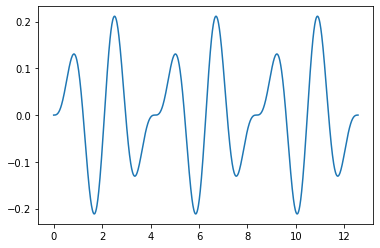

In [14]:
Omega = 3
OmegaBar = Omega*1.5
F0 = 1
A0 = F0/(Omega**2 - OmegaBar**2)
Beta = OmegaBar/Omega

_response = lambda t: A0*(np.sin(OmegaBar*t) - Beta*np.sin(Omega*t))

t_data = np.concatenate([np.linspace(0, 0., 1000), np.linspace(0, 4*np.pi, 1000)])
u_data = _response(t_data)

plt.plot(t_data, u_data)

In [15]:
Beta

1.5

In [16]:
# sn.clear_session()
t = sn.Variable('t')
u = sn.Functional('u', t, 4*[20], 'tanh')
L1 = sn.diff(u, t, order=2) + Omega**2*u - F0*sn.sin(OmegaBar*t)
L2 = (1 - sn.sign(t)) * u
L3 = (1 - sn.sign(t)) * sn.diff(u, t)

In [17]:
model = sn.SciModel([t], [sn.PDE(L1),L2,L3], optimizer='adam')

In [18]:
h = model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=1, # epochs=10000
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)


Total samples: 2000 
Batch size: 100 
Total batches: 20 


+ NTK evaluation time [s]: 0.5770065784454346 

+ adaptive_weights at epoch 1: [0.10522449849275284, 2.6913962115561323, 0.2033792899511145]
20/20 [==============================] - 2s 8ms/step - batch: 9.5000 - size: 100.0000 - loss: 0.2930 - sub_2_loss: 2.5207 - mul_99_loss: 0.0011 - mul_100_loss: 0.1217 - lr: 0.0010 - time: 3.2609 - loss_weight_0: 0.1052 - loss_weight_1: 2.6914 - loss_weight_2: 0.2034 - loss_gradient_0: 29791.6467 - loss_gradient_1: 69.5285 - loss_gradient_2: 1742.8626


In [19]:
h2 = model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=1, # recommended 5000
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)


Total samples: 2000 
Batch size: 100 
Total batches: 20 


+ NTK evaluation time [s]: 1.0732402801513672 

+ adaptive_weights at epoch 1: [0.016265708822646403, 2.8629125543243443, 0.1208217390881836]
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 100.0000 - loss: 0.0175 - sub_2_loss: 0.6964 - mul_99_loss: 3.3718e-04 - mul_100_loss: 0.0427 - lr: 0.0010 - time: 1.1723 - loss_weight_0: 0.0163 - loss_weight_1: 2.8629 - loss_weight_2: 0.1208 - loss_gradient_0: 23906.0112 - loss_gradient_1: 62.7978 - loss_gradient_2: 1620.9905


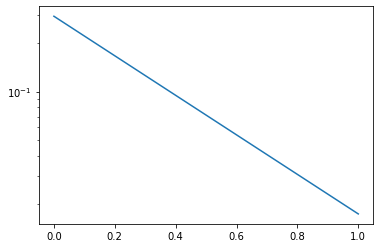

In [20]:
plt.semilogy(h.history['loss'] + h2.history['loss'])

In [21]:
# sn.clear_session()
T = sn.Variable('T')
U = sn.Functional('U', T, 4*[20], 'sin')
L1 = sn.diff(U, T, order=2) + Omega**2*U - F0*sn.sin(OmegaBar*T)
L2 = (1 - sn.sign(T)) * U
L3 = (1 - sn.sign(T)) * sn.diff(U, T)

In [22]:
Model = sn.SciModel([T], [sn.PDE(L1),L2,L3], optimizer='adam')

In [24]:
H = Model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=1, #recommended 10000
    reduce_lr_after=200,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)


Total samples: 2000 
Batch size: 100 
Total batches: 20 


+ NTK evaluation time [s]: 1.3066892623901367 

+ adaptive_weights at epoch 1: [0.0072617737282852455, 2.8157967640395802, 0.17694146311689068]
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 100.0000 - loss: 2.5679e-06 - sub_3_loss: 1.4396e-04 - mul_164_loss: 4.0203e-07 - mul_165_loss: 2.2064e-06 - lr: 0.0010 - time: 1.4131 - loss_weight_0: 0.0073 - loss_weight_1: 2.8158 - loss_weight_2: 0.1769 - loss_gradient_0: 27402.2294 - loss_gradient_1: 73.2173 - loss_gradient_2: 1158.5450


In [25]:
H2 = Model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=1, #recommended 5000
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)


Total samples: 2000 
Batch size: 100 
Total batches: 20 


+ NTK evaluation time [s]: 1.6390902996063232 

+ adaptive_weights at epoch 1: [0.01021685629437795, 2.812131577309759, 0.17765157589535369]
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 100.0000 - loss: 2.8524e-05 - sub_3_loss: 9.1822e-04 - mul_164_loss: 6.4575e-06 - mul_165_loss: 5.5375e-06 - lr: 0.0010 - time: 1.7569 - loss_weight_0: 0.0102 - loss_weight_1: 2.8121 - loss_weight_2: 0.1777 - loss_gradient_0: 22816.6692 - loss_gradient_1: 79.0689 - loss_gradient_2: 1250.8826


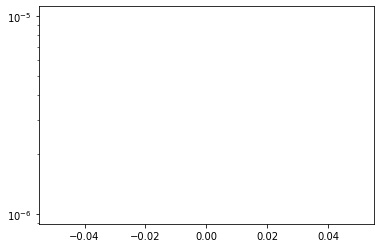

In [26]:
plt.semilogy(H.history['loss'])

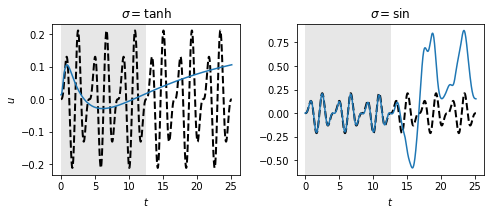

In [27]:
t_test = np.linspace(0, 4*np.pi, 1000)
t_test = np.linspace(0, 8*np.pi, 1000)

fig, ax = plt.subplots(1,2,figsize=(8,3))

# ax[0].axhspan(0, 1, facecolor='0.2', alpha=0.1)
ax[0].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[0].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[0].plot(t_test, u.eval(t_test), label='$\hat{u}: \mathrm{tanh}-4 \\times 20$') 
ax[0].set_title('$\\sigma = \mathrm{tanh}$')

ax[1].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[1].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[1].plot(t_test, U.eval(t_test), label='$\hat{u}: \\mathrm{sin}-4 \\times 20$') 
ax[1].set_title('$\\sigma = \mathrm{sin}$')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$u$')

# ax[1].legend()
plt.subplots_adjust(0.1, 0.15, 0.85, 0.85, 0.3, 0.3)
plt.savefig('Forced-Vibration.pdf', pdi=300)